In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob
import json

In [5]:
all_results = [] # index 1 corresponds with experiment 1, index 2 with exp2, etc

for exp in ['exp1','exp2', 'exp3', 'exp4', 'exp5', 'exp6']:

    exp_df = pd.DataFrame()

    for fname in glob(f'./results/{exp}*.json'):
        with open(fname, 'r') as f:
            results = json.load(f)['results']
            
            for result in results:

                result_dict = {}
                result_dict["macro_avg_f1_score"] = [result["report"]["macro avg"]["f1-score"]]
                result_dict["weighted_avg_f1_score"] = [result["report"]["weighted avg"]["f1-score"]]
                result.pop('report')
                for k, v in result.pop('classifier_params').items():
                    result_dict[k] = [v]
                
                for k, v in result.pop('vectorizer_params').items():
                    result_dict[k] = [v]

                for k, v in result.items():
                    result_dict[k] = [v]
                
                exp_df = pd.concat([exp_df, pd.DataFrame(result_dict)], sort=False, ignore_index=True).fillna(0)   

    all_results.append(exp_df)         


C:\Users\rooty\AppData\Local\Temp\ipykernel_24404\3987644233.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exp_df = pd.concat([exp_df, pd.DataFrame(result_dict)], sort=False, ignore_index=True).fillna(0)
C:\Users\rooty\AppData\Local\Temp\ipykernel_24404\3987644233.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exp_df = pd.concat([exp_df, pd.DataFrame(result_dict)], sort=False, ignore_index=True).fillna(0)
C:\Users\rooty\AppData\Local\Temp\ipykernel_24404\3987644233.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bf

In [6]:
all_results[5]

,macro_avg_f1_score,weighted_avg_f1_score,learning_rate,n_estimators,rsm,depth,ngram_range,preprocessor,max_df,vectorizer,val_f1_macro_mean,val_f1_weighted_mean,drop_in_f1_macro_mean,drop_in_f1_weighed_mean,colsample_bytree,max_depth
0,0.401892,0.658738,0.100,148,0.75,6.0,"[1, 3]",0,0.5,CountVectorizer,0.615708,0.708859,0.213816,0.050121,0.0,0.0
1,0.466529,0.751789,0.100,117,0.75,6.0,"[1, 3]",SnowballStemmer,0.5,CountVectorizer,0.613851,0.705908,0.147322,-0.045881,0.0,0.0
2,0.434489,0.703367,0.100,159,0.75,6.0,"[1, 1]",SnowballStemmer,0.9,CountVectorizer,0.613478,0.704033,0.178989,0.000667,0.0,0.0
3,0.453261,0.734383,0.100,84,1.00,6.0,"[1, 1]",0,0.9,CountVectorizer,0.613366,0.704986,0.160105,-0.029396,0.0,0.0
4,0.431089,0.702235,0.100,174,0.75,6.0,"[1, 3]",SnowballStemmer,0.9,CountVectorizer,0.613299,0.705349,0.182210,0.003114,0.0,0.0
5,0.394636,0.648857,0.100,81,0.75,6.0,"[1, 1]",0,0.5,CountVectorizer,0.613169,0.705973,0.218533,0.057116,0.0,0.0
6,0.439676,0.711777,0.100,164,1.00,6.0,"[1, 1]",SnowballStemmer,0.9,CountVectorizer,0.612545,0.703242,0.172869,-0.008535,0.0,0.0
7,0.449007,0.727135,0.100,90,1.00,6.0,"[1, 1]",SnowballStemmer,0.5,CountVectorizer,0.612423,0.701271,0.163416,-0.025864,0.0,0.0
8,0.408578,0.668161,0.100,103,1.00,10.0,"[1, 3]",0,0.5,CountVectorizer,0.612405,0.707237,0.203827,0.039076,0.0,0.0
9,0.411522,0.672277,0.100,125,1.00,10.0,"[1, 3]",0,0.9,CountVectorizer,0.611953,0.705008,0.200431,0.032730,0.0,0.0


In [7]:
macro_mean_drop_df = pd.DataFrame()

for i, exp_df in enumerate(all_results):
    macro_mean_drop_df = pd.concat([macro_mean_drop_df, exp_df["drop_in_f1_macro_mean"]], axis=1)
macro_mean_drop_df.columns = ['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6']

In [8]:
macro_mean_drop_df


,Exp 1,Exp 2,Exp 3,Exp 4,Exp 5,Exp 6
0,0.362384,0.173298,0.175380,0.109153,0.178252,0.213816
1,0.362384,0.173298,0.175380,0.109153,0.159636,0.147322
2,0.362833,0.176601,0.169687,0.207979,0.173716,0.178989
3,0.362833,0.176601,0.169687,0.207979,0.162825,0.160105
4,0.365429,0.172062,0.135543,0.240212,0.165856,0.182210
5,0.365429,0.172062,0.135543,0.240212,0.153791,0.218533
6,0.361366,0.172656,0.137269,0.246703,0.166555,0.172869
7,0.361366,0.172656,0.137269,0.246703,0.154615,0.163416
8,0.373885,0.174822,0.153720,0.179996,0.165595,0.203827
9,0.373885,0.174822,0.153720,0.179996,0.173210,0.200431


In [9]:
avg = macro_mean_drop_df.mean(axis=0).mean() # avg across all experiments
print(f'The average across all experiments: {avg}')

The average across all experiments: 0.22259483121473175


In [10]:
macro_mean_drop_df.mean(None)

0.22259483121473173

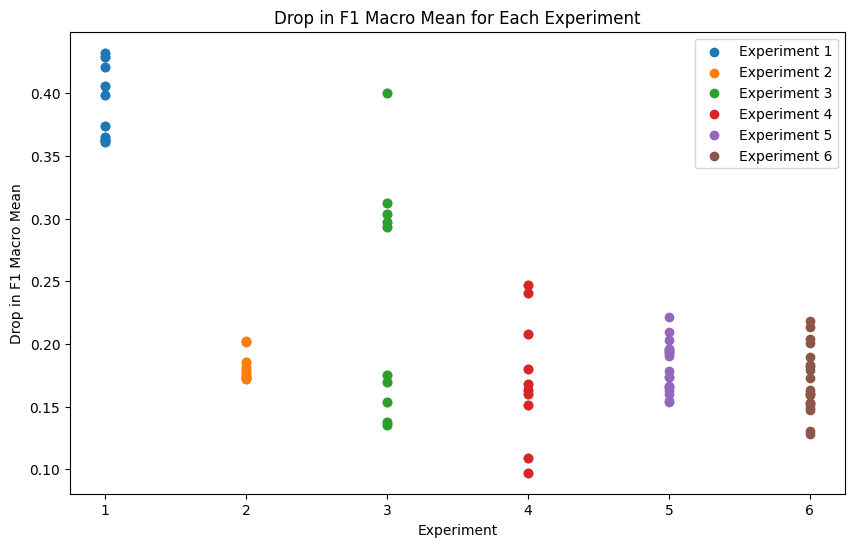

In [11]:
plt.figure(figsize=(10, 6))

for i, exp_df in enumerate(all_results):
    plt.scatter([i+1]*len(exp_df), exp_df['drop_in_f1_macro_mean'], label=f'Experiment {i+1}')

plt.xlabel('Experiment')
plt.ylabel('Drop in F1 Macro Mean')
plt.title('Drop in F1 Macro Mean for Each Experiment')
plt.legend()
plt.show()

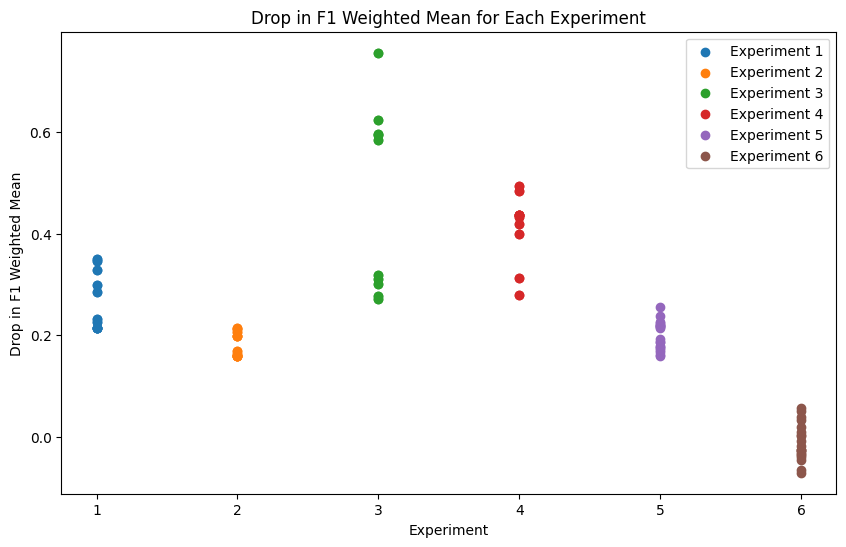

In [12]:
plt.figure(figsize=(10, 6))

for i, exp_df in enumerate(all_results):
    plt.scatter([i+1]*len(exp_df), exp_df['drop_in_f1_weighed_mean'], label=f'Experiment {i+1}')

plt.xlabel('Experiment')
plt.ylabel('Drop in F1 Weighted Mean')
plt.title('Drop in F1 Weighted Mean for Each Experiment')
plt.legend()
plt.show()

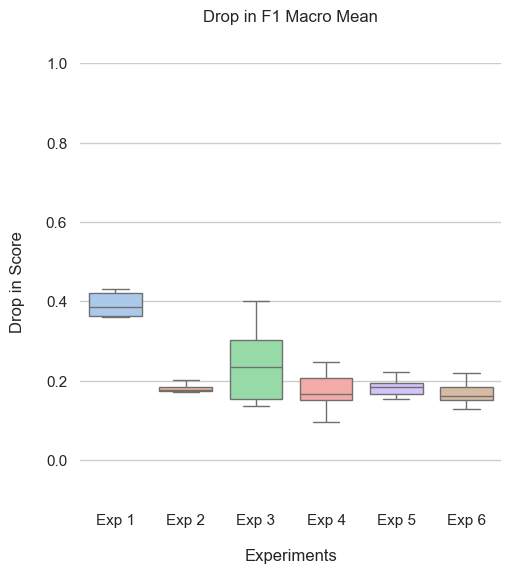

In [13]:
sns.set_theme(style="ticks", palette="pastel")
sns.set_style('whitegrid')

ax = sns.catplot(
    data=macro_mean_drop_df,
    kind="box",
    width=0.75
)

ax.set(ylim=(-0.1, 1.0))
sns.despine(offset=0, bottom=True, left=True)
# ax.xaxis.labelpad = 20
# ax.yaxis.labelpad = 20

plt.xlabel("Experiments", labelpad=15)
plt.ylabel("Drop in Score", labelpad=15)
plt.title("Drop in F1 Macro Mean", pad=30);

In [14]:
all_macro_mean_drop = pd.Series()

for col in macro_mean_drop_df.columns:
    all_macro_mean_drop = pd.concat([all_macro_mean_drop, macro_mean_drop_df[col]], axis=0)

C:\Users\rooty\AppData\Local\Temp\ipykernel_24404\3346053482.py:4: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  all_macro_mean_drop = pd.concat([all_macro_mean_drop, macro_mean_drop_df[col]], axis=0)


In [15]:
all_macro_mean_drop.mean()

0.22259483121473173

Text(0.5, 1.0, 'Drop in F1 Macro Mean')

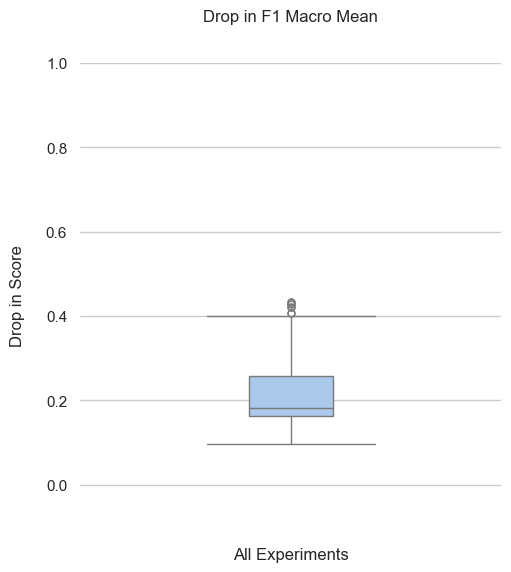

In [16]:
sns.set_theme(style="ticks", palette="pastel")
sns.set_style('whitegrid')

ax = sns.catplot(
    all_macro_mean_drop,
    kind='box',
    widths=(.2),  
)

ax.set(ylim=(-0.1, 1.0))
sns.despine(offset=0, bottom=True, left=True)
# ax.xaxis.labelpad = 20
# ax.yaxis.labelpad = 20

plt.xlabel("All Experiments", labelpad=5)
plt.ylabel("Drop in Score", labelpad=15)
plt.title("Drop in F1 Macro Mean", pad=30)

In [17]:
weighted_mean_drop_df = pd.DataFrame()

for i, exp_df in enumerate(all_results):
    weighted_mean_drop_df = pd.concat([weighted_mean_drop_df, exp_df["drop_in_f1_weighed_mean"]], axis=1)
weighted_mean_drop_df.columns = ['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6']

In [27]:
avg_w = weighted_mean_drop_df.mean(None)
avg_w

0.25340599884045906

Text(0.5, 1.0, 'Drop in F1 Weighted Mean')

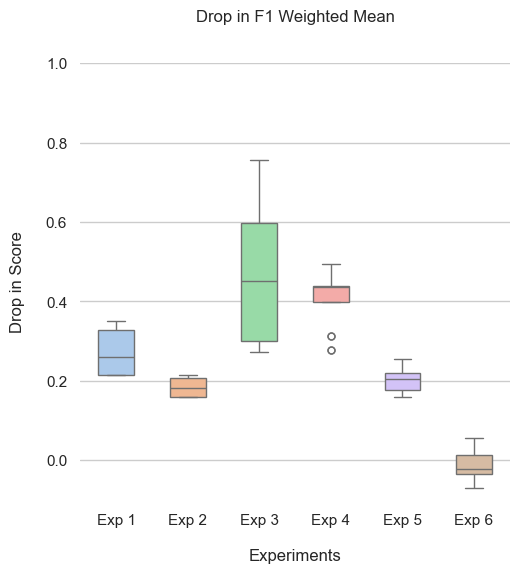

In [30]:
sns.set_theme(style="ticks", palette="pastel")
sns.set_style('whitegrid')

ax = sns.catplot(
    data=weighted_mean_drop_df,
    kind="box",
    width=0.5
)

ax.set(ylim=(-0.1, 1.0))
sns.despine(offset=0, bottom=True, left=True)
# ax.xaxis.labelpad = 20
# ax.yaxis.labelpad = 20

plt.xlabel("Experiments", labelpad=15)
plt.ylabel("Drop in Score", labelpad=15)
plt.title("Drop in F1 Weighted Mean", pad=30)

In [2]:
# results with oov values

all_results_oov = [] # index 1 corresponds with experiment 1, index 2 with exp2, etc

for exp, train_ds_name, test_ds_name in [('exp1', 'd1', 'd2'), ('exp2', 'd1', 'd3'), ('exp3', 'd2', 'd1'), ('exp4', 'd2', 'd3'), ('exp5', 'd3', 'd1'), ('exp6', 'd3', 'd2')]:

    exp_df = pd.DataFrame()
    for model_type in ['catb', 'xgb']:
        for fname in glob(f'./results_w_oov/{exp}*{model_type}*.json'):
            with open(fname, 'r') as f:
                results = json.load(f)['results']
                
                for result in results:
                
                    result_dict = {}
                    result_dict["macro_avg_f1_score"] = [result["report"]["macro avg"]["f1-score"]]
                    result_dict["weighted_avg_f1_score"] = [result["report"]["weighted avg"]["f1-score"]]
                    result_dict["num_oov_feats"] = [result["num_oov_feats"]]                                    
                    result_dict["train_dataset"] = [train_ds_name]
                    result_dict["test_dataset"] = [test_ds_name]
                    result_dict["classifier"] = [model_type]
                    result.pop('report')
                    for k, v in result.pop('classifier_params').items():
                        result_dict[k] = [v]
                    
                    for k, v in result.pop('vectorizer_params').items():
                        result_dict[k] = [v]
    
                    for k, v in result.items():
                        result_dict[k] = [v]
                    
                    exp_df = pd.concat([exp_df, pd.DataFrame(result_dict)], sort=False, ignore_index=True).fillna(0)   
    
    all_results_oov.append(exp_df)  

C:\Users\rooty\AppData\Local\Temp\ipykernel_19180\1956077660.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exp_df = pd.concat([exp_df, pd.DataFrame(result_dict)], sort=False, ignore_index=True).fillna(0)
C:\Users\rooty\AppData\Local\Temp\ipykernel_19180\1956077660.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exp_df = pd.concat([exp_df, pd.DataFrame(result_dict)], sort=False, ignore_index=True).fillna(0)
C:\Users\rooty\AppData\Local\Temp\ipykernel_19180\1956077660.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bf

In [8]:
all_results_oov[0].head()

,macro_avg_f1_score,weighted_avg_f1_score,num_oov_feats,train_dataset,test_dataset,classifier,learning_rate,n_estimators,rsm,depth,ngram_range,preprocessor,max_df,vectorizer,val_f1_macro_mean,val_f1_weighted_mean,drop_in_f1_macro_mean,drop_in_f1_weighed_mean,colsample_bytree,max_depth
0,0.364642,0.615796,279907,d1,d2,catb,0.1,173,1.00,10.0,"[1, 3]",0,0.5,"CountVectorizer(max_df=0.5, ngram_range=(1, 3))",0.727026,0.829362,0.362384,0.213566,0.0,0.0
1,0.364642,0.615796,279907,d1,d2,catb,0.1,173,1.00,10.0,"[1, 3]",0,0.9,"CountVectorizer(max_df=0.9, ngram_range=(1, 3))",0.727026,0.829362,0.362384,0.213566,0.0,0.0
2,0.363573,0.614495,9275,d1,d2,catb,0.1,159,0.75,10.0,"[1, 1]",0,0.9,CountVectorizer(max_df=0.9),0.726406,0.829272,0.362833,0.214777,0.0,0.0
3,0.363573,0.614495,9275,d1,d2,catb,0.1,159,0.75,10.0,"[1, 1]",0,0.5,CountVectorizer(max_df=0.5),0.726406,0.829272,0.362833,0.214777,0.0,0.0
4,0.360906,0.604093,7652,d1,d2,catb,0.1,153,1.00,10.0,"[1, 1]",<function pp_SnowballStemmer at 0x7fe02c7ce310>,0.9,"CountVectorizer(max_df=0.9,\n p...",0.726335,0.829886,0.365429,0.225793,0.0,0.0


In [5]:
# get correlation between drop in f1 score and oov feats
drop_and_oov_df = pd.DataFrame(columns=['drop_in_f1_macro_mean', 'drop_in_f1_weighed_mean', 'train_dataset', 'test_dataset', 'test_dataset_size'])

for df in all_results_oov:
    tmp = df.loc[:, ['drop_in_f1_macro_mean', 'drop_in_f1_weighed_mean', 'train_dataset', 'test_dataset']]
    drop_and_oov_df = pd.concat([drop_and_oov_df, tmp], axis=0)

drop_and_oov_df.columns = ['drop_in_f1_macro_mean', 'drop_in_f1_weighted_mean', 'train_dataset', 'test_dataset', 'oov_to_total_ratio']

with open('oov_ratios.json', 'r') as f:
    results = json.load(f)

drop_and_oov_df['oov_to_total_ratio'] = results

drop_and_oov_df.head()

C:\Users\rooty\AppData\Local\Temp\ipykernel_19180\1391023017.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  drop_and_oov_df = pd.concat([drop_and_oov_df, tmp], axis=0)


,drop_in_f1_macro_mean,drop_in_f1_weighted_mean,train_dataset,test_dataset,oov_to_total_ratio
0,0.362384,0.213566,d1,d2,0.394451
1,0.362384,0.213566,d1,d2,0.394451
2,0.362833,0.214777,d1,d2,0.044487
3,0.362833,0.214777,d1,d2,0.044487
4,0.365429,0.225793,d1,d2,0.036464


In [7]:
from scipy import stats

# null hypothesis: the rank correlation is zero
# alt hypothesis: the rank correlation is non-zero      

a = drop_and_oov_df['oov_to_total_ratio']
b = drop_and_oov_df['drop_in_f1_macro_mean']
c = drop_and_oov_df['drop_in_f1_weighted_mean']

# Perform Pearson correlation test
pr_s1, pr_p1 = stats.pearsonr(a, b)
pr_s2, pr_p2 = stats.pearsonr(a, c)

print(f'Pearson: stat: {pr_s1}, p-value: {pr_p1}')
print(f'Pearson: stat: {pr_s2}, p-value: {pr_p2}')


kt_s1, kt_p1 = stats.kendalltau(a, b)
kt_s2, kt_p2 = stats.kendalltau(a, c)

print(f'KendallTau: stat: {kt_s1}, p-value: {kt_p1}')
print(f'KendallTau: stat: {kt_s2}, p-value: {kt_p2}')

sr_s1, sr_p1 = stats.spearmanr(a, b)
sr_s2, sr_p2 = stats.spearmanr(a, c)

print(f'Spearmanr: stat: {sr_s1}, p-value: {sr_p1}')
print(f'Spearmanr: stat: {sr_s2}, p-value: {sr_p2}')

Pearson: stat: -0.05925476888566027, p-value: 0.5203054852470531
Pearson: stat: -0.01050908753481887, p-value: 0.9093016409949595
KendallTau: stat: -0.15873538444337817, p-value: 0.01155796041621824
KendallTau: stat: -0.007137382394036788, p-value: 0.9095942162538816
Spearmanr: stat: -0.21896070295694386, p-value: 0.016273590848466035
Spearmanr: stat: 0.0020508122290507974, p-value: 0.9822641688042327


In [41]:
# test if kendall accounts for repeated values
df = pd.DataFrame([(.2, .3), (.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])

df.corr(method='kendall')

,dogs,cats
dogs,1.000000,-0.881917
cats,-0.881917,1.000000


In [34]:
len(np.unique(drop_and_oov_df.loc[:, ['num_oov_feats','drop_in_f1_macro_mean']]))

110

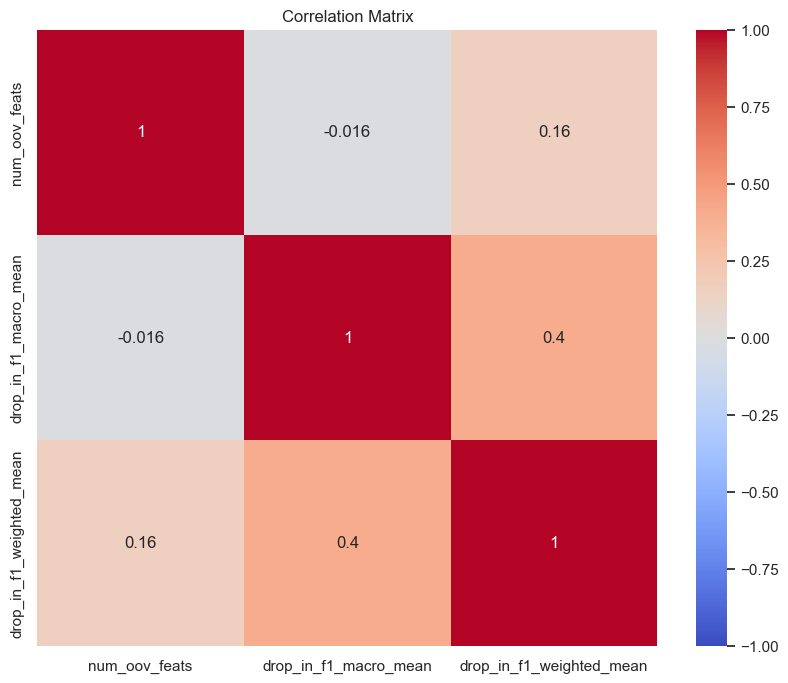

In [22]:
# Calculate the correlation matrix
correlation_matrix = drop_and_oov_df.corr('pearson')

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()



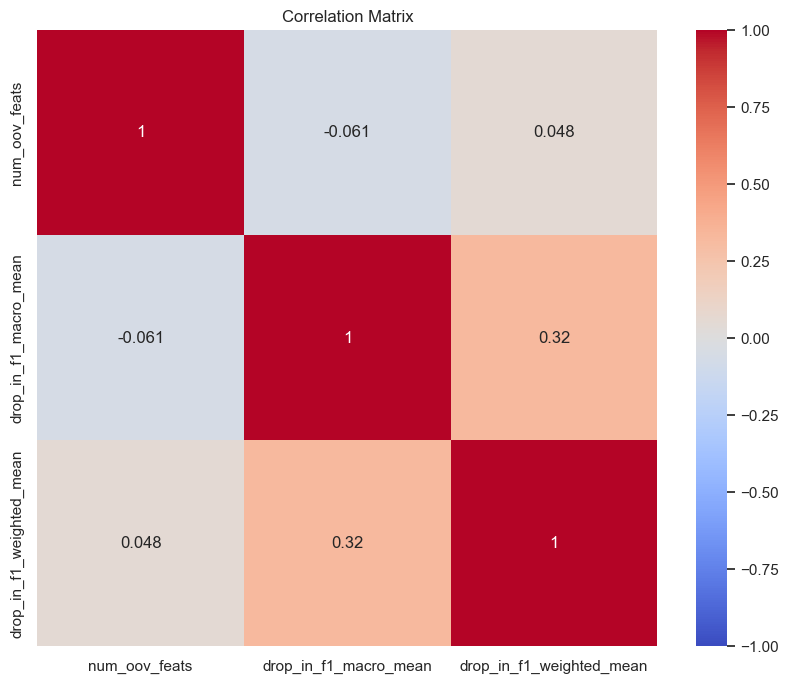

In [23]:
# Calculate the correlation matrix
correlation_matrix = drop_and_oov_df.corr('kendall')

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

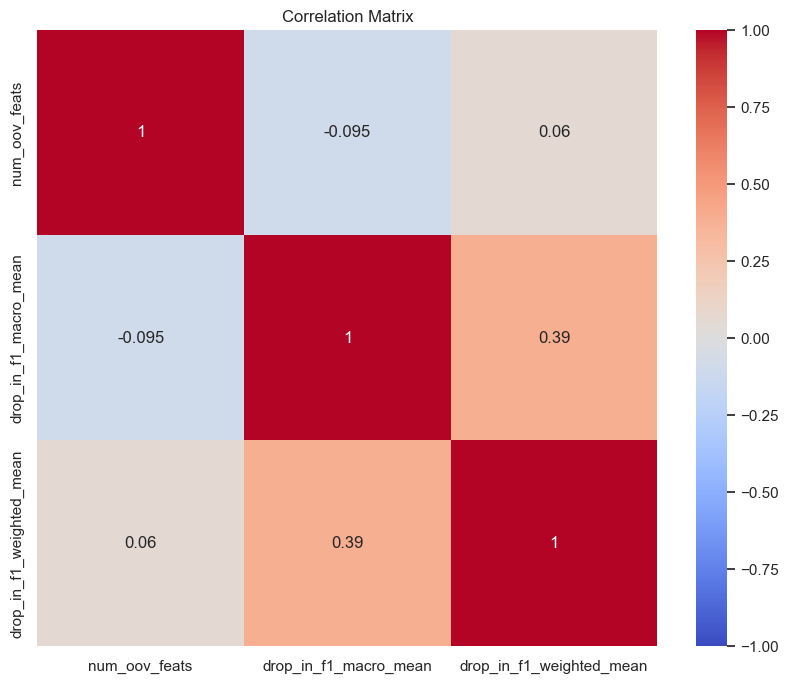

In [24]:
# Calculate the correlation matrix
correlation_matrix = drop_and_oov_df.corr('spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

c:\Users\rooty\UWEC\Research\CyberBullyingML\cyberbullyingml\lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  scout = method(scout_x, scout_y, **kws)
c:\Users\rooty\UWEC\Research\CyberBullyingML\cyberbullyingml\lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


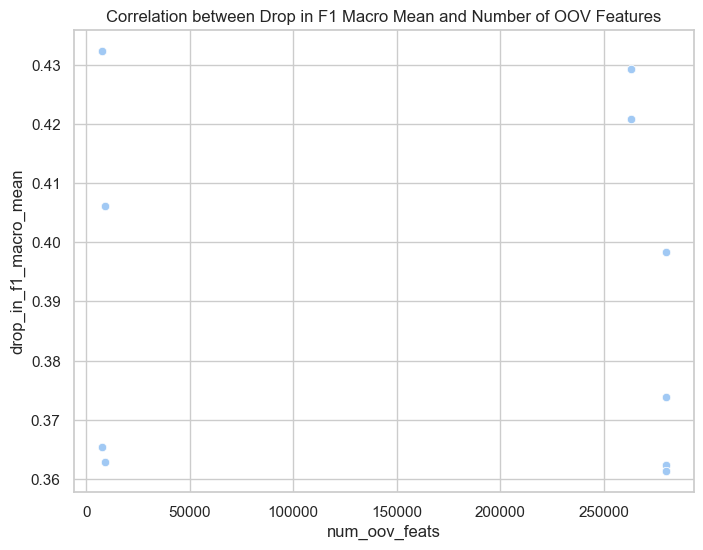

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the relevant columns for correlation
drop_in_f1_macro_mean = all_results_oov[0]["drop_in_f1_macro_mean"]
num_oov_feats = all_results_oov[0]["num_oov_feats"]

# Create a DataFrame with the relevant columns
correlation_df = pd.DataFrame({
    "drop_in_f1_macro_mean": drop_in_f1_macro_mean,
    "num_oov_feats": num_oov_feats
})

# Calculate the correlation matri

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.scatterplot(correlation_df, x='num_oov_feats', y='drop_in_f1_macro_mean', c="b", vmin=-1, vmax=1)
plt.title("Correlation between Drop in F1 Macro Mean and Number of OOV Features")
plt.show()

In [45]:
macro_mean_drop_df_w_oov = pd.DataFrame()

for i, exp_df in enumerate(all_results):
    macro_mean_drop_df_w_oov = pd.concat([macro_mean_drop_df_w_oov, exp_df["oov_feats"]], axis=1)
macro_mean_drop_df_w_oov.columns = ['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6']

KeyError: 'oov_feats'

In [43]:
macro_mean_drop_df_w_oov

,Exp 1,Exp 2,Exp 3,Exp 4,Exp 5,Exp 6
0,0.362384,0.173298,0.175380,0.109153,0.178252,0.213816
1,0.362384,0.173298,0.175380,0.109153,0.159636,0.147322
2,0.362833,0.176601,0.169687,0.207979,0.173716,0.178989
3,0.362833,0.176601,0.169687,0.207979,0.162825,0.160105
4,0.365429,0.172062,0.135543,0.240212,0.165856,0.182210
5,0.365429,0.172062,0.135543,0.240212,0.153791,0.218533
6,0.361366,0.172656,0.137269,0.246703,0.166555,0.172869
7,0.361366,0.172656,0.137269,0.246703,0.154615,0.163416
8,0.373885,0.174822,0.153720,0.179996,0.165595,0.203827
9,0.373885,0.174822,0.153720,0.179996,0.173210,0.200431
